In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('D:\\prasad\\practice\\My Working Projects\\Inprocess\\Profit Prediction using Linear Regression')

In [3]:
df=pd.read_csv('online.csv')

In [4]:
df.head(2)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06


In [5]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df['Area'].unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [8]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [9]:
df.head(2)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

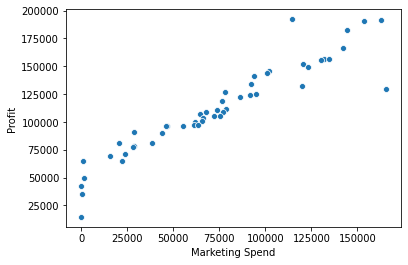

In [10]:
sns.scatterplot(df['Marketing Spend'],df['Profit'])

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

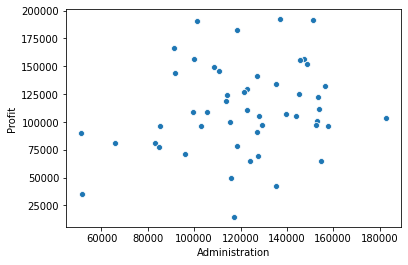

In [11]:
sns.scatterplot(df['Administration'],df['Profit'])

<AxesSubplot:xlabel='Transport', ylabel='Profit'>

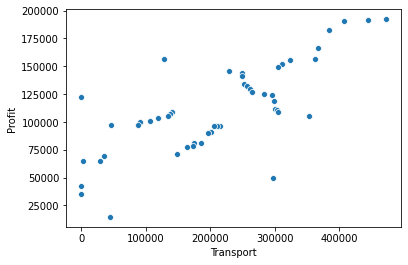

In [12]:
sns.scatterplot(df['Transport'],df['Profit'])

<AxesSubplot:xlabel='Area', ylabel='Profit'>

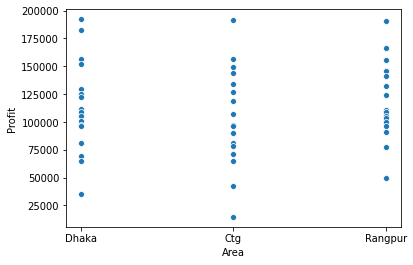

In [13]:
sns.scatterplot(df['Area'],df['Profit'])

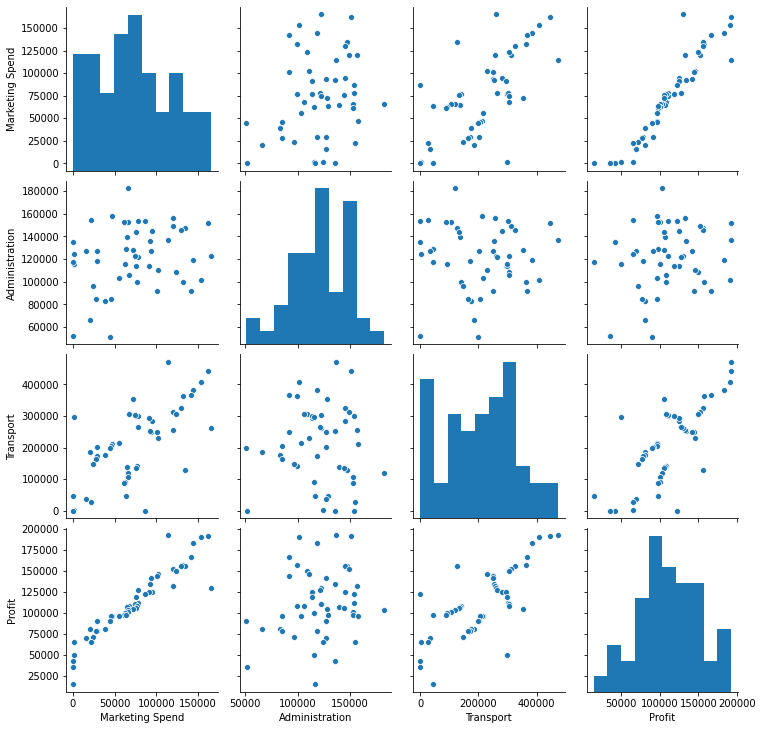

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df=pd.get_dummies(df)

In [16]:
df.head(2)

,Marketing Spend,Administration,Transport,Profit,Area_Ctg,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,192261.83,0,1,0
1,162597.70,151377.59,443898.53,191792.06,1,0,0


In [17]:
df.shape

(50, 7)

In [18]:
df2=df.drop('Profit',axis=1)

In [19]:
corln=df2.corrwith(df.Profit)

In [20]:
corln

Marketing Spend    0.937948
Administration     0.200717
Transport          0.747766
Area_Ctg          -0.145837
Area_Dhaka         0.031368
Area_Rangpur       0.116244
dtype: float64

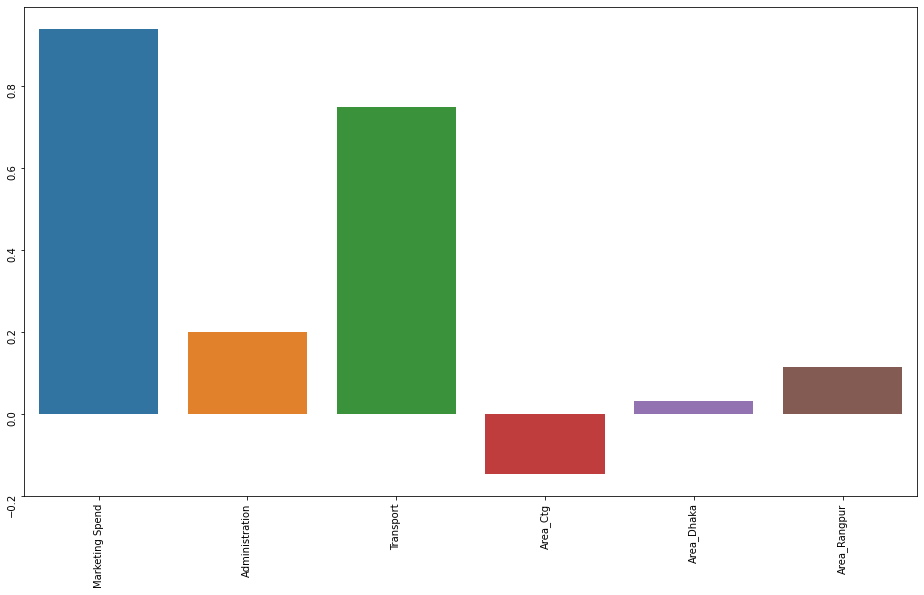

In [23]:
plt.figure(figsize=(16,9))
ax=sns.barplot(corln.index,corln)
ax.tick_params(labelrotation=90)
plt.show()

In [24]:
df.head(2)

,Marketing Spend,Administration,Transport,Profit,Area_Ctg,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,192261.83,0,1,0
1,162597.70,151377.59,443898.53,191792.06,1,0,0


In [25]:
X=df.drop('Profit',axis=1)
X.head(2)

,Marketing Spend,Administration,Transport,Area_Ctg,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0


In [26]:
y=df['Profit']
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 6), (10, 6), (40,), (10,))

In [30]:
sc=StandardScaler()

In [31]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [33]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [34]:
def check_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('r2_score:',r2_score(y_test,y_pred))

In [35]:
check_model(LinearRegression(),X_train,X_test,y_train,y_test)

r2_score: 0.8389824679943142


In [36]:
check_model(LinearRegression(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: 0.317309544493784


In [37]:
check_model(RandomForestRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.897583030877737


In [38]:
check_model(RandomForestRegressor(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: -0.2866079153181025


In [42]:
check_model(DecisionTreeRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.8917344879860392


In [43]:
check_model(DecisionTreeRegressor(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: -0.7617403136891476


In [44]:
check_model(SVR(),X_train,X_test,y_train,y_test)

r2_score: -0.1799573361922968


In [45]:
check_model(SVR(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: -0.1802047701254379


In [46]:
check_model(AdaBoostRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.87562592187301


In [47]:
check_model(AdaBoostRegressor(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: -0.4452389201122231


In [48]:
check_model(XGBRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.8858001795992219


In [49]:
check_model(XGBRegressor(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: -0.7264924274698954


In [50]:
check_model(KNeighborsRegressor(),X_train,X_test,y_train,y_test)

r2_score: 0.2951749212443924


In [51]:
check_model(KNeighborsRegressor(),X_train_sc,X_test_sc,y_train,y_test)

r2_score: 0.05049637922014394


### Select Final Model

In [ ]:
RandomForestRegressor()

In [52]:
n_estimators=[int(x) for x in np.linspace(100,1200,num=12)]
max_depth=[int(x) for x in np.linspace(10,30,num=5)]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,3,5,10,15,20]
max_features=['auto','sqrt']

In [55]:
random_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'max_features':max_features}

In [59]:
rf_random=RandomizedSearchCV(RandomForestRegressor(),
    param_distributions=random_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42).fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.7s finished


In [60]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=600)

In [61]:
rf_random.best_index_

8

In [62]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [63]:
rf_random.best_score_

-169552582.5154951

In [64]:
rf=RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=20)

In [65]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.9070373634150605


In [66]:
rf.score(X_train,y_train)

0.989635818542145

In [67]:
rf.score(X_test,y_test)

0.9070373634150605

In [70]:
cv=cross_val_score(RandomForestRegressor(n_estimators=600,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=20),
                  X_train,y_train,cv=5)
print('n_split',cv)
print('average',np.average(cv))

n_split [0.94439288 0.7907518  0.94934747 0.95605601 0.83532072]
average 0.8951737772453546


### Save Model in Pickle & Joblib

In [68]:
import pickle
import joblib

In [69]:
pickle.dump(rf,open('profit.pickle','wb'))

In [71]:
joblib.dump(rf,'profit.joblib')

['profit.joblib']

### Load Pickle Model

In [72]:
model_pickle=pickle.load(open('profit.pickle','rb'))

In [74]:
model_pickle.score(X_train,y_train)

0.989635818542145

In [75]:
model_pickle.score(X_test,y_test)

0.9070373634150605

### Load Joblib Model

In [76]:
model_joblib=joblib.load('profit.joblib')

In [77]:
model_joblib.score(X_train,y_train)

0.989635818542145

In [78]:
model_joblib.score(X_test,y_test)

0.9070373634150605